In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab09A.ipynb")

---

<h3><center>E7 -  Introduction to Programming for Scientists and Engineers</center></h3>

<h2><center>Lab session #09-A <br></center></h2>

<h1><center>Bisection and Newton-Raphson for solving nonlinear equations<br></center></h1>

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from resources.hashutils import *

# Question 1: Spherical container

<center><img src="resources/sphere.png" width=300/></center>

The figure above shows a spherical glass container used to mix liquids. The container has a hole through which the liquids are poured, and a small propeller to do the mixing. Unfortunately the container is old and the tick marks indicating the volume of liquid are no longer legible. The only way to know the amount of liquid in the container is to measure the height $h$ of the fluid's surface, and then to use the formula for the volume of a partially filled sphere:

$$ V = \frac{\pi h^2}{3} \left(3r - h \right) $$

Here $r=10$ cm is the radius of the sphere and $V$ is the volume in cubic centimeters (i.e. milliliters)

In [3]:
r = 10   # radius in centimeters

## Question 1.1: Volume evaluation

Write a function called `evalV` that takes the fluid level `h` (in centimeters), and returns to volume of fluid in milliliters, according to the formula just given. 

**Note**
+ `r` is considered a global constant and therefore not passed through the arguments. 

In [4]:
def evalV(h):
    volume = (np.pi*h**2)/3*(3*r-h)
    return volume

In [5]:
grader.check("q1p1")

q1p1 results: All test cases passed!

## Question 1.2: Total volume

What is the total volume of the sphere in liters?

In [6]:
total_volume = evalV(2*r)*0.001

In [7]:
grader.check("q1p2")

q1p2 results: All test cases passed!


A chemical recipe requires that you mix 3 liters of a liquid using the glass sphere. You decide to use the root-finding methods learned in class to find the level $h$ corresponding to this volume of liquid. You begin by plotting the function $V(h)$ in order to get a sense of the answer.

## Question 1.3: Plot volume versus height

Make the plot shown in the figure. The plot shows
+ the volume of liquid as a function of height $h$ (magenta line), and
+ the desired volume (dotted blue line)

Other specifications:

+ The x-axis grid for the magenta line should consist of fifty values ranging from 0 to $2r$ (inclusive).
+ `figsize=(8,4)`
+ The grid and legend as shown in the plot.

<img src="resources/volvsheight.png" width=400 />

**Note**
+ Plot the horizontal line using `plot` or [`axhline`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html), but **not hlines**, otherwise the autograder will fail. 


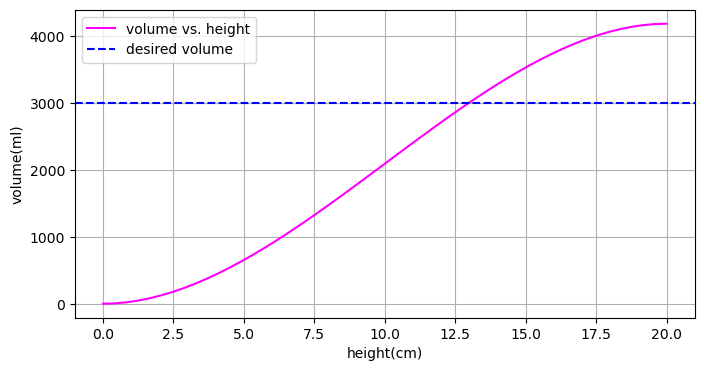

In [8]:
fig1, ax1 = plt.subplots(figsize=(8,4))
x = np.linspace(0,2*r,50)
y = evalV(x)
ax1.plot(x,y, color = 'magenta', label = 'volume vs. height')
ax1.axhline(3000, linestyle = 'dashed', color = 'blue', label = 'desired volume')
ax1.set_xlabel('height(cm)')
ax1.set_ylabel('volume(ml)')
ax1.grid()
ax1.legend()

In [9]:
grader.check("q1p3")

q1p3 results: All test cases passed!

## Question 1.4: Equation to solve

We can see in the figure above that 3 liters of fluid corresponds to a height of a little more than 12.5 centimeters. To solve this more precisely, we must find the exact point at which the function $V(h)$ crosses the horizontal line at 3000 milliliters. In other words, we must find the roots of the function $f(h)$:

$$ f(h)=V(h)-3000$$

Define the function `evalf(h)` that evaluates $f(h)$.

In [10]:
def evalf(h):
    function = evalV(h) - 3000
    return function

In [11]:
grader.check("q1p4")

q1p4 results: All test cases passed!

## Question 1.5: Number of bisection steps

Write a function called `compute_bisection_steps(N0,P0,maxwidth)` that computes the number of bisection steps needed to reduce the interval width from `|P0-N0|` to less or equal than `maxwidth`. The formula for doing this was derived in lecture and is reproduced below.

$$ k = \text{ceil} \left( \log_2 \left( \frac{ |P_0-N_0| }{ \bar{w}} \right)  \right) $$

**Hint**:
+ NumPy's [ceil](https://numpy.org/doc/stable/reference/generated/numpy.ceil.html) method returns a float. You should cast this to an integer in order to avoid problems in later parts.
+ Return `0` whenever $|P_0-N_0|<\bar{w}$. 

In [12]:
def compute_bisection_steps(N0,P0,maxwidth):
    k = np.ceil(np.log2(abs(P0-N0)/maxwidth))
    if abs(P0-N0) < maxwidth:
        return 0
    else:
        return int(k)

In [13]:
# You can use this cell to test your code
maxwidth = 1
N0 = 0
P0 = 0.6
numsteps =  compute_bisection_steps(N0,P0,maxwidth)
numsteps

0

In [14]:
grader.check("q1p5")

q1p5 results: All test cases passed!

## Question 1.6: Bisection

Implement the bisection algorithm as it was described in lecture. 

Carefully follow the comments in the template. 

The `bisection` method takes as inputs the initial interval values `N0` and `P0`, and the desired `maxwidth`. Here, `N0` is the value of $h$ corresponding to a *negative* evaluation of $f(h)$, and `P0` is the value of $h$ corresponding to a *positive* evaluation of $f(h)$. The `bisection` method should return two NumPy arrays, `N` and `P`, corresponding to the the *negative* and *positive* sequences.

**Note**
+ In the case where $|P_0-N_0|<\bar{w}$, the code should return `(np.array(N0), np.array(P0))`.



In [57]:
def bisection(N0,P0,maxwidth):

    # Use the method defined in a previous part to compute 
    # the number of bisection steps to execute.
    numsteps = compute_bisection_steps(N0,P0,maxwidth) 

    # If no steps are taken, return the initial guesses
    if numsteps==0:
        return N0, P0

    # Initialize the negative and positive sequences
    # These are 1D NumPy arrays of length numsteps
    # They will be filled completely, so you can use np.empty
    # Put N0 and P0 in the first position of N and P respectively
    N = np.empty(numsteps)
    P = np.empty(numsteps)
    N[0] = N0
    P[0] = P0

    # k iterates from 1 to numsteps-1
    for k in range(1,numsteps):

        # Find midpoint of the negative and positive sequences
        C = (N[k-1]+P[k-1])/2
        
        # evaluate f(C)
        fC = evalf(C)

        # compute N[k] and P[k]
        if fC < 0:
            N[k] = C
            P[k] = P[k-1]
        else:
            P[k] = C
            N[k] = N[k-1]
        
    return N, P

In [58]:
# You can use this cell to test your code
maxwidth = 0.1
N0 = 0
P0 = 20
N, P = bisection(N0,P0,maxwidth)
N, P

(array([ 0.     , 10.     , 10.     , 12.5    , 12.5    , 12.5    ,
        12.8125 , 12.96875]),
 array([20.   , 20.   , 15.   , 15.   , 13.75 , 13.125, 13.125, 13.125]))

In [59]:
grader.check("q1p6")

q1p6 results: All test cases passed!

## Question 1.7: Plot

Plot the sequences `N` and `P` computed by the bisection method with parameters `N0=0`, `P0=20`, and `maxwidth=0.1`.
Define `hsol` as the midpoint of the last interval returned by the bisection iteration. 

Other specifications:

+ The `N` and `P` lines have `linewidth=2` and `marker='o'`.  
+ Draw a horizontal line at the level of `hsol`. Again, use `axhline` or `plot`.
+ Include the grid and legend as shown in the plot. 

<center><img src="resources/bisection.png" width=600/></center>



Text(0, 0.5, 'height {cm]')

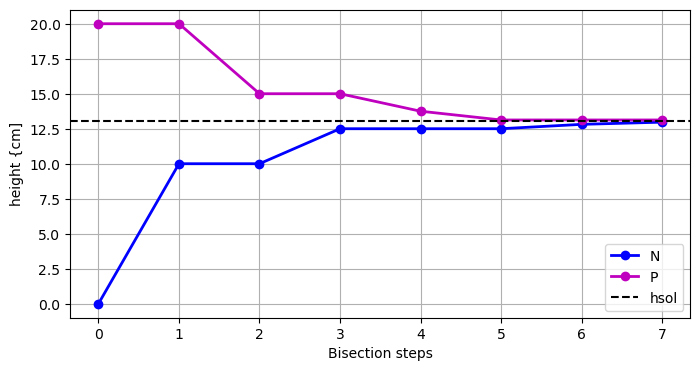

In [18]:
N, P = bisection(0,20,0.1)
hsol = (N[7]+P[7])/2

fig2, ax2 = plt.subplots(figsize=(8,4))
ax2.plot(N, color = 'blue',linewidth=2, marker='o', label= 'N' )
ax2.plot(P, color = 'm',linewidth=2, marker='o', label= 'P' )
ax2.axhline(hsol, linestyle = "dashed", color = 'black', label = 'hsol')
ax2.grid()
ax2.legend(loc=4)
ax2.set_xlabel('Bisection steps')
ax2.set_ylabel('height {cm]')


In [19]:
grader.check("q1p7")

q1p7 results: All test cases passed!

## Question 1.8: Derivative of $f(h)$


Next we will apply the Newton-Raphson algorithm to the same problem. This is possible since the function that we are solving is differentiable, and the derivative can be easily evaluated in code. Implement the function `evalfprime` that returns $f'(h)$: the derivative of $f$ for a given value of $h$. 

Recall:

\begin{align*} 
&V(h) = \frac{\pi h^2}{3} \left(3r - h \right) \\
&f(h)=V(h)-3000
\end{align*}



In [20]:
def evalfprime(h):
    fprime = (2*r*np.pi*h) - (np.pi*h**2)
    return fprime

In [21]:
grader.check("q1p8")

q1p8 results: All test cases passed!

## Question 1.9: Newton-Raphson

Implement the Newton-Raphson algorithm that was described in lecture.

The function `newton_raphson(x0,taux,tauf,maxsteps)` takes an initial guess `x0`, tolerances `taux` and `tauf`, and the maximum number of steps `maxsteps`. It returns a NumPy array with the sequence of values, beginning with `x0`.

**Note**. 

1. You will notice that the steps do not exactly follow the pseudo-code. The psuedo-code involves a "repeat-until", which in Python could be implemented with a "while" loop. However we do it here with a "for" loop. The reason for this is that, when using NumPy it is better to pre-allocate the entire array (with np.full, np.empty, np.zeros, etc.) than to extend the array in each iteration. But once we allocated a fixed-size array, it is more natural (more explicit, more clear) to iterate through it with a "for" loop than with a "while" loop.

2. Note also that the function is cubic and therefore may have up to three real roots. In fact, this function *does* have three real roots, but only one of them is in the acceptable range of heights, between 0 and 20 cm. This is ok. You should allow the Newton-Raphson method to return these "unphysical" solutions if it finds them.

In [42]:
def newton_raphson(x0,taux,tauf,maxsteps):

    # Allocate x by creating an array of np.nan values of length maxsteps
    x = np.zeros(maxsteps)

    # Put the initial guess in the first position of x
    x[0] = x0

    # Iterate through the un-assigned values in x.
    for k in np.arange(1,maxsteps):

        # Find the next value in the sequence according to the Newton-Raphson update formula
        x[k] = x[k-1] - (evalf(x[k-1])/evalfprime(x[k-1]))
                
        # Break if the difference between the latest two values in the sequence is less than taux
        if abs(x[k] - x[k-1]) < taux:
            break

        # Break if the function evaluation is within tauf of zero.
        if abs(evalf(x[k])) < tauf:
            break

    # If either of the two break conditions were hit, then there will be trailing NaNs in x. 
    # Remove any trailing NaNs. 
    x = x[x != 0]

    return x

In [43]:
# Use this cell to test your code
x = newton_raphson(x0=20.5,taux=.01,tauf=2,maxsteps=100)
x

array([20.5       , 57.16946421, 42.79050897, 33.80633698, 28.65364288,
       26.28847765, 25.68394297, 25.64367079])

In [44]:
grader.check("q1p9")

q1p9 results: All test cases passed!

## Question 1.10: Compare Bisection and Newton-Raphson

We can now test both methods to see which converges in fewer steps. Note that this does not imply that it takes less *time*, since the steps of one algorithm may be more computationally expensive (and therefore *slower*) than the steps of another algorithm. Between bisection and Newton-Raphson, it would seem that a Newton-Raphson step is more expensive, since it involves evaluations of both $f(h)$ and $f'(h)$, whereas bisection only evaluates $f(h)$.

Make the plot shown below that overlays the progression of both algorithms. Here is the specification. 

For bisection:
+ Run the algorithm with `N0=0`, `P0=20`, and `maxwidth=0.1`.
+ Plot the upper and lower limits of the interval with solid lines and 'o' markers. 
+ Use the [ax.fill_between](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.fill_between.html) method to shade in the space between the two limits (I like to use a transparency value of `alpha=0.2` for this). 
+ Label the "fill_between" element (not the upper and lower lines) as "Bisection".

For Newton-Raphson:
+ Run the algorithm with `x0=5`, `taux=0.1`, `tauf=0`, `maxsteps=10`.
+ Plot the sequence with a solid line and 'o' markers. 
+ Label it as "Newton-Raphson".

For the solution.
+ Consider the last value of the Newton-Raphson sequence to be the solution. 
+ Plot a horizontal dashed line that goes through the solution. 
+ Label it as "solution".

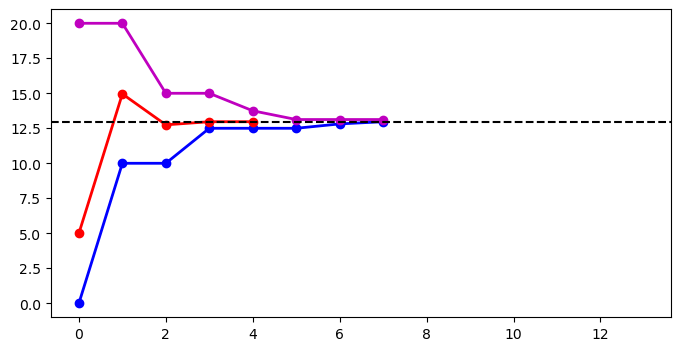

In [65]:
N, P = bisection(0,20,0.1)
numsteps = compute_bisection_steps(0,20,0.1)
R = newton_raphson(5,0.1,0,10)
solution = newton_raphson(5,0.1,0,10)[-1]
fig3, ax3 = plt.subplots(figsize=(8,4))
ax3.plot(N, color = 'blue',linewidth=2, marker='o', label= 'N' )
ax3.plot(P, color = 'm',linewidth=2, marker='o', label= 'P' )
ax3.fill_between(N[-1],P,N, alpha = 0.2,label= 'Bisection')
ax3.plot(R, color = 'red',linewidth=2, marker='o', label = "Newton-Raphson")
ax3.axhline(solution, linestyle = "dashed", color = 'black', label = 'solution')

In [66]:
grader.check("q1p10")

q1p10 results: All test cases passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [67]:
grader.check_all()

q1p1 results: All test cases passed!

q1p10 results: All test cases passed!

q1p2 results: All test cases passed!

q1p3 results: All test cases passed!

q1p4 results: All test cases passed!

q1p5 results: All test cases passed!

q1p6 results: All test cases passed!

q1p7 results: All test cases passed!

q1p8 results: All test cases passed!

q1p9 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [69]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)